In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/1axis'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/1axis


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Windows 10
Python version  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas version  1.5.3
bifacial_radiance version  0.4.2+313.g615fab5.dirty
pyplot  3.5.2


In [4]:
simulationname = '1axis-groundscan'

# Location
lat = 39.7555
lon = -105.2211

# Scene Parameters
azimuth_ang=90 # Facing south
tilt=30

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 6 # m
albedo = 0.2
clearance_height = 0.5 # m  
nMods = 4 
nRows = 3

sceneDict = {'tilt':10,'pitch':3,'clearance_height':0.2,'azimuth':180, 'nMods': 20, 'nRows': 7} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/1axis
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects\PVmod.rad will be overwritten



In [7]:
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-01', endtime='2021-06-30_23')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
hub_height = 1.5
pitch = 5.7
sazm = 180 # axis angle, N-S = 180
fixed_tilt_angle = None
gcr = 2 / pitch
cumulativesky = True

trakerParams = {
    'limit_angle': 50,
    'angledelta': 30,
    'backtrack': True,
    'gcr': gcr,
    'cumulativesky': cumulativesky,
    'azimuth': sazm,  # axis angle, N-S = 180
    'fixed_tilt_angle': fixed_tilt_angle
}

In [9]:
trackerdict = demo.set1axis(**trakerParams)

Saving file EPWs\1axis_-60.0.csv, # points: 90
Saving file EPWs\1axis_-30.0.csv, # points: 90
Saving file EPWs\1axis_-0.0.csv, # points: 90
Saving file EPWs\1axis_30.0.csv, # points: 90
Saving file EPWs\1axis_60.0.csv, # points: 90


In [10]:
if cumulativesky:
    demo.genCumSky1axis()
else:
    demo.gendaylit1axis()

message: There were 90 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-60.0.rad
message: There were 89 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-30.0.rad
message: There were 84 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-0.0.rad
message: There were 86 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_30.0.rad
message: There were 86 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_60.0.rad


In [11]:
sceneDict = {
    'pitch': pitch,
    'hub_height': hub_height,
    'nMods': 5,
    'nRows': 2
}

In [12]:
trakerdict = demo.makeScene1axis(module=moduletype, sceneDict=sceneDict)
trakerdict = demo.makeOct1axis()


Making .rad files for cumulativesky 1-axis workflow
5 Radfiles created in /objects/

Making 5 octfiles in root directory.
Created 1axis_-60.0.oct
Created 1axis_-30.0.oct
Created 1axis_-0.0.oct
Created 1axis_30.0.oct
Created 1axis_60.0.oct


In [13]:
sensorsgroundvalues = np.array([3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])
angles = np.array([-0.0, -30.0, -60.0, 30.0, 60.0])

In [14]:
trakerdict = demo.analysis1axis(sensorsy=4)

Linescan in process: 1axis_-60.0_Scene0_Row1_Module3_Front
Linescan in process: 1axis_-60.0_Scene0_Row1_Module3_Back
Saved: results\irr_1axis_-60.0_Scene0_Row1_Module3.csv
Index: -60.0. Wm2Front: 55661.01500000001. Wm2Back: 5829.6795
Linescan in process: 1axis_-30.0_Scene0_Row1_Module3_Front
Linescan in process: 1axis_-30.0_Scene0_Row1_Module3_Back
Saved: results\irr_1axis_-30.0_Scene0_Row1_Module3.csv
Index: -30.0. Wm2Front: 48793.14000000001. Wm2Back: 6447.7505
Linescan in process: 1axis_-0.0_Scene0_Row1_Module3_Front
Linescan in process: 1axis_-0.0_Scene0_Row1_Module3_Back
Saved: results\irr_1axis_-0.0_Scene0_Row1_Module3.csv
Index: -0.0. Wm2Front: 41335.857500000006. Wm2Back: 6370.5775
Linescan in process: 1axis_30.0_Scene0_Row1_Module3_Front
Linescan in process: 1axis_30.0_Scene0_Row1_Module3_Back
Saved: results\irr_1axis_30.0_Scene0_Row1_Module3.csv
Index: 30.0. Wm2Front: 42138.4375. Wm2Back: 5908.6885
Linescan in process: 1axis_60.0_Scene0_Row1_Module3_Front
Linescan in process:

In [15]:
resultsdict = {}

for i, sensorsground in enumerate(sensorsgroundvalues):
    print("Doing sensor", i)
    print(f"sensorsground: {sensorsground}")
    trakerdict = demo.analysis1axisground(customname='_sensorsground_' + str(sensorsground), 
                                          sensorsground=sensorsground, append=False)
    angleswm2dict = {}
    
    for i, angle in enumerate(angles):
        wm2 = []
        for i, x in enumerate(trakerdict[angle]['AnalysisObj'][0].x):
             if x >= 1 and x <= pitch - 1:
                wm2.append(trakerdict[angle]['AnalysisObj'][0].Wm2Ground[i])
        resultsdict[(sensorsground)] = np.mean(wm2)

Doing sensor 0
sensorsground: 3
Linescan in process: 1axis_groundscan_-60.0_sensorsground_3_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_3.csv
Index: -60.0. Wm2Ground: 32180.183333333338. sensorsground: 3
Linescan in process: 1axis_groundscan_-30.0_sensorsground_3_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_3.csv
Index: -30.0. Wm2Ground: 38278.986666666664. sensorsground: 3
Linescan in process: 1axis_groundscan_-0.0_sensorsground_3_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_3.csv
Index: -0.0. Wm2Ground: 31459.036666666663. sensorsground: 3
Linescan in process: 1axis_groundscan_30.0_sensorsground_3_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_3.csv
Index: 30.0. Wm2Ground: 33346.0. sensorsground: 3
Linescan in process: 1axis_groundscan_60.0_sensorsground_3_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_3.csv
Index: 60.0. Wm2Ground: 22922.286666666667. sensorsground: 3
Doing sensor 1
sensorsground: 5
Linescan in process: 1axis_groundscan_-60.0_sensorsground_5_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_5.csv
Index: -60.0. Wm2Ground: 31967.307999999997. sensorsground: 5
Linescan in process: 1axis_groundscan_-30.0_sensorsground_5_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_5.csv
Index: -30.0. Wm2Ground: 39528.758. sensorsground: 5
Linescan in process: 1axis_groundscan_-0.0_sensorsground_5_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_5.csv
Index: -0.0. Wm2Ground: 35702.082. sensorsground: 5
Linescan in process: 1axis_groundscan_30.0_sensorsground_5_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_5.csv
Index: 30.0. Wm2Ground: 32266.506. sensorsground: 5
Linescan in process: 1axis_groundscan_60.0_sensorsground_5_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_5.csv
Index: 60.0. Wm2Ground: 21028.632. sensorsground: 5
Doing sensor 2
sensorsground: 10
Linescan in process: 1axis_groundscan_-60.0_sensorsground_10_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_10.csv
Index: -60.0. Wm2Ground: 32818.547. sensorsground: 10
Linescan in process: 1axis_groundscan_-30.0_sensorsground_10_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_10.csv
Index: -30.0. Wm2Ground: 40560.78799999999. sensorsground: 10
Linescan in process: 1axis_groundscan_-0.0_sensorsground_10_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_10.csv
Index: -0.0. Wm2Ground: 36622.754. sensorsground: 10
Linescan in process: 1axis_groundscan_30.0_sensorsground_10_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_10.csv
Index: 30.0. Wm2Ground: 31504.144999999997. sensorsground: 10
Linescan in process: 1axis_groundscan_60.0_sensorsground_10_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_10.csv
Index: 60.0. Wm2Ground: 20665.147000000004. sensorsground: 10
Doing sensor 3
sensorsground: 20
Linescan in process: 1axis_groundscan_-60.0_sensorsground_20_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_20.csv
Index: -60.0. Wm2Ground: 32610.912499999995. sensorsground: 20
Linescan in process: 1axis_groundscan_-30.0_sensorsground_20_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_20.csv
Index: -30.0. Wm2Ground: 40512.6635. sensorsground: 20
Linescan in process: 1axis_groundscan_-0.0_sensorsground_20_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_20.csv
Index: -0.0. Wm2Ground: 37942.870500000005. sensorsground: 20
Linescan in process: 1axis_groundscan_30.0_sensorsground_20_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_20.csv
Index: 30.0. Wm2Ground: 30395.783999999996. sensorsground: 20
Linescan in process: 1axis_groundscan_60.0_sensorsground_20_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_20.csv
Index: 60.0. Wm2Ground: 20104.117. sensorsground: 20
Doing sensor 4
sensorsground: 30
Linescan in process: 1axis_groundscan_-60.0_sensorsground_30_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_30.csv
Index: -60.0. Wm2Ground: 32569.432999999997. sensorsground: 30
Linescan in process: 1axis_groundscan_-30.0_sensorsground_30_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_30.csv
Index: -30.0. Wm2Ground: 40731.82433333333. sensorsground: 30
Linescan in process: 1axis_groundscan_-0.0_sensorsground_30_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_30.csv
Index: -0.0. Wm2Ground: 38161.668333333335. sensorsground: 30
Linescan in process: 1axis_groundscan_30.0_sensorsground_30_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_30.csv
Index: 30.0. Wm2Ground: 30625.73. sensorsground: 30
Linescan in process: 1axis_groundscan_60.0_sensorsground_30_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_30.csv
Index: 60.0. Wm2Ground: 20067.835333333333. sensorsground: 30
Doing sensor 5
sensorsground: 100
Linescan in process: 1axis_groundscan_-60.0_sensorsground_100_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_100.csv
Index: -60.0. Wm2Ground: 33272.7451. sensorsground: 100
Linescan in process: 1axis_groundscan_-30.0_sensorsground_100_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_100.csv
Index: -30.0. Wm2Ground: 40282.214100000005. sensorsground: 100
Linescan in process: 1axis_groundscan_-0.0_sensorsground_100_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_100.csv
Index: -0.0. Wm2Ground: 38668.335100000004. sensorsground: 100
Linescan in process: 1axis_groundscan_30.0_sensorsground_100_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_100.csv
Index: 30.0. Wm2Ground: 30415.242. sensorsground: 100
Linescan in process: 1axis_groundscan_60.0_sensorsground_100_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_100.csv
Index: 60.0. Wm2Ground: 19990.6891. sensorsground: 100
Doing sensor 6
sensorsground: 150
Linescan in process: 1axis_groundscan_-60.0_sensorsground_150_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_150.csv
Index: -60.0. Wm2Ground: 32719.569600000003. sensorsground: 150
Linescan in process: 1axis_groundscan_-30.0_sensorsground_150_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_150.csv
Index: -30.0. Wm2Ground: 40693.72866666666. sensorsground: 150
Linescan in process: 1axis_groundscan_-0.0_sensorsground_150_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_150.csv
Index: -0.0. Wm2Ground: 39287.41306666667. sensorsground: 150
Linescan in process: 1axis_groundscan_30.0_sensorsground_150_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_150.csv
Index: 30.0. Wm2Ground: 30539.034733333337. sensorsground: 150
Linescan in process: 1axis_groundscan_60.0_sensorsground_150_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_150.csv
Index: 60.0. Wm2Ground: 19874.23126666667. sensorsground: 150
Doing sensor 7
sensorsground: 200
Linescan in process: 1axis_groundscan_-60.0_sensorsground_200_Fron

c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_200.csv
Index: -60.0. Wm2Ground: 32700.955149999998. sensorsground: 200
Linescan in process: 1axis_groundscan_-30.0_sensorsground_200_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_200.csv
Index: -30.0. Wm2Ground: 40546.7668. sensorsground: 200
Linescan in process: 1axis_groundscan_-0.0_sensorsground_200_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_200.csv
Index: -0.0. Wm2Ground: 38992.58885. sensorsground: 200
Linescan in process: 1axis_groundscan_30.0_sensorsground_200_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_200.csv
Index: 30.0. Wm2Ground: 30655.2056. sensorsground: 200
Linescan in process: 1axis_groundscan_60.0_sensorsground_200_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_200.csv
Index: 60.0. Wm2Ground: 20066.1187. sensorsground: 200
Doing sensor 8
sensorsground: 250
Linescan in process: 1axis_groundscan_-60.0_sensorsground_250_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_250.csv
Index: -60.0. Wm2Ground: 32856.15812. sensorsground: 250
Linescan in process: 1axis_groundscan_-30.0_sensorsground_250_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_250.csv
Index: -30.0. Wm2Ground: 41199.830120000006. sensorsground: 250
Linescan in process: 1axis_groundscan_-0.0_sensorsground_250_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_250.csv
Index: -0.0. Wm2Ground: 38134.36400400001. sensorsground: 250
Linescan in process: 1axis_groundscan_30.0_sensorsground_250_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_250.csv
Index: 30.0. Wm2Ground: 30541.296560000003. sensorsground: 250
Linescan in process: 1axis_groundscan_60.0_sensorsground_250_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_250.csv
Index: 60.0. Wm2Ground: 19979.3446. sensorsground: 250
Doing sensor 9
sensorsground: 300
Linescan in process: 1axis_groundscan_-60.0_sensorsground_300_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_300.csv
Index: -60.0. Wm2Ground: 32422.0525. sensorsground: 300
Linescan in process: 1axis_groundscan_-30.0_sensorsground_300_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_300.csv
Index: -30.0. Wm2Ground: 40485.25666666667. sensorsground: 300
Linescan in process: 1axis_groundscan_-0.0_sensorsground_300_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_300.csv
Index: -0.0. Wm2Ground: 39326.90081666666. sensorsground: 300
Linescan in process: 1axis_groundscan_30.0_sensorsground_300_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_300.csv
Index: 30.0. Wm2Ground: 30042.9626. sensorsground: 300
Linescan in process: 1axis_groundscan_60.0_sensorsground_300_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_300.csv
Index: 60.0. Wm2Ground: 20059.1606. sensorsground: 300
Doing sensor 10
sensorsground: 400
Linescan in process: 1axis_groundscan_-60.0_sensorsground_400_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_400.csv
Index: -60.0. Wm2Ground: 32734.7767. sensorsground: 400
Linescan in process: 1axis_groundscan_-30.0_sensorsground_400_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_400.csv
Index: -30.0. Wm2Ground: 40683.832774999995. sensorsground: 400
Linescan in process: 1axis_groundscan_-0.0_sensorsground_400_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_400.csv
Index: -0.0. Wm2Ground: 39427.79935000001. sensorsground: 400
Linescan in process: 1axis_groundscan_30.0_sensorsground_400_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_400.csv
Index: 30.0. Wm2Ground: 30471.762750000005. sensorsground: 400
Linescan in process: 1axis_groundscan_60.0_sensorsground_400_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_400.csv
Index: 60.0. Wm2Ground: 20215.114125. sensorsground: 400
Doing sensor 11
sensorsground: 500
Linescan in process: 1axis_groundscan_-60.0_sensorsground_500_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2954: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.0_sensorsground_500.csv
Index: -60.0. Wm2Ground: 32757.567. sensorsground: 500
Linescan in process: 1axis_groundscan_-30.0_sensorsground_500_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_500.csv
Index: -30.0. Wm2Ground: 41060.0381. sensorsground: 500
Linescan in process: 1axis_groundscan_-0.0_sensorsground_500_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_500.csv
Index: -0.0. Wm2Ground: 38387.17296. sensorsground: 500
Linescan in process: 1axis_groundscan_30.0_sensorsground_500_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_500.csv
Index: 30.0. Wm2Ground: 30386.82666. sensorsground: 500
Linescan in process: 1axis_groundscan_60.0_sensorsground_500_Front
Saved: results\irr_1axis_groundscan_60.0_sensorsground_500.csv
Index: 60.0. Wm2Ground: 19789.660399999997. sensorsground: 500


In [16]:
trakerdict

{-0.0: {'csvfile': 'EPWs\\1axis_-0.0.csv',
  'surf_azm': 90.00000495874207,
  'surf_tilt': 0.0,
  'datetime': Index(['2021-06-01 05:00:00', '2021-06-01 12:00:00', '2021-06-01 13:00:00',
         '2021-06-02 05:00:00', '2021-06-02 12:00:00', '2021-06-02 13:00:00',
         '2021-06-03 05:00:00', '2021-06-03 12:00:00', '2021-06-03 13:00:00',
         '2021-06-04 05:00:00', '2021-06-04 12:00:00', '2021-06-04 13:00:00',
         '2021-06-05 05:00:00', '2021-06-05 12:00:00', '2021-06-05 13:00:00',
         '2021-06-06 05:00:00', '2021-06-06 12:00:00', '2021-06-06 13:00:00',
         '2021-06-07 05:00:00', '2021-06-07 12:00:00', '2021-06-07 13:00:00',
         '2021-06-08 05:00:00', '2021-06-08 12:00:00', '2021-06-08 13:00:00',
         '2021-06-09 05:00:00', '2021-06-09 12:00:00', '2021-06-09 13:00:00',
         '2021-06-10 05:00:00', '2021-06-10 12:00:00', '2021-06-10 13:00:00',
         '2021-06-11 05:00:00', '2021-06-11 12:00:00', '2021-06-11 13:00:00',
         '2021-06-12 05:00:00', '2

In [17]:
resultsdict

{3: 19809.28,
 5: 18737.36,
 10: 18715.111666666668,
 20: 18212.237499999996,
 30: 18239.095555555556,
 100: 18275.953281249997,
 150: 18196.18322916667,
 200: 18404.91276923077,
 250: 18334.16888888889,
 300: 18477.57829896907,
 400: 18499.204538461538,
 500: 18229.18296296296}

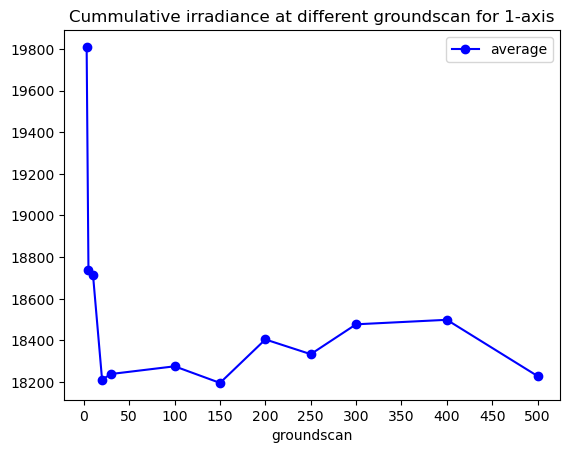

In [18]:
df1 = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': resultsdict.values()
})

df1.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Cummulative irradiance at different groundscan for 1-axis')
plt.show()